# Manipulacion de DF

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({
    'key': ['A','B','C','A','B','C'],
    'value1': range(6),
    'value2': np.random.randint(0,100,6)
})

In [4]:
df

,key,value1,value2
0,A,0,2
1,B,1,92
2,C,2,39
3,A,3,87
4,B,4,11
5,C,5,11


### Agregate

In [8]:
# Agrupar columnas por la key y realizar funciones sobre ellas
df.groupby('key').aggregate(['min', np.median, np.mean, max])

value1                 value2                 
       min median mean max    min median  mean max
key                                               
A        0    1.5  1.5   3      2   44.5  44.5  87
B        1    2.5  2.5   4     11   51.5  51.5  92
C        2    3.5  3.5   5     11   25.0  25.0  39

In [9]:
# Agrupar columnas por la key y realizar funciones independientes sobre ellas
df.groupby('key').aggregate({
    'value1': 'min',
    'value2': max
})

,value1,value2
key,,
A,0,87
B,1,92
C,2,39


### Filter

In [12]:
# Obtener la desviacion tipica
df.groupby('key').std()

,value1,value2
key,,
A,2.12132,60.104076
B,2.12132,57.275649
C,2.12132,19.798990


In [13]:
# Crear una funcion que obtiene las filas con una desviacion tipica de value2
# mayor que 20
def filter_func(x):
    return x['value2'].std()>20

In [14]:
df.groupby('key').filter(filter_func)

,key,value1,value2
0,A,0,2
1,B,1,92
3,A,3,87
4,B,4,11


### Transform

In [17]:
df.groupby('key').transform(lambda x: x - x.mean())

,value1,value2
0,-1.5,-42.5
1,-1.5,40.5
2,-1.5,14.0
3,1.5,42.5
4,1.5,-40.5
5,1.5,-14.0


### Apply

In [19]:
def norm_by_col2(x):
    x['value1'] /= x['value2'].sum()
    return x

In [20]:
df.groupby('key').apply(norm_by_col2)

,key,value1,value2
0,A,0.000000,2
1,B,0.009709,92
2,C,0.040000,39
3,A,0.033708,87
4,B,0.038835,11
5,C,0.100000,11


### División de datos por columnas

In [21]:
L = [0,1,0,2,1,0]
df.groupby(L).sum()

,value1,value2
0,7,52
1,5,103
2,3,87


In [22]:
df.groupby('key').sum()

,value1,value2
key,,
A,3,89
B,5,103
C,7,50


In [23]:
df2 = df.set_index('key')
df2

,value1,value2
key,,
A,0,2
B,1,92
C,2,39
A,3,87
B,4,11
C,5,11


In [24]:
mapping = {
    'A': 'vowel',
    'B': 'consonant',
    'C': 'consonant',
}

In [25]:
df2.groupby(mapping).sum()

,value1,value2
consonant,12,153
vowel,3,89


In [26]:
# Transformar a minusculas
df2.groupby(str.lower).mean()

,value1,value2
a,1.5,44.5
b,2.5,51.5
c,3.5,25.0


In [29]:
# Agrupacion por multiples factores
df2.groupby([str.lower, mapping]).mean()

,,value1,value2
a,vowel,1.5,44.5
b,consonant,2.5,51.5
c,consonant,3.5,25.0


### Gráficos desde Data Frames y Exportación 

In [33]:
years = [year for year in range(1900,2020)]
deads = [(y + np.random.uniform(0,100) - 1850) for y in years]

In [36]:
df = pd.DataFrame({
    "year": years,
    "deads": deads,
})

In [37]:
df.head()

,year,deads
0,1900,52.588890
1,1901,71.294560
2,1902,104.824911
3,1903,68.564298
4,1904,99.869365


<AxesSubplot:xlabel='year'>

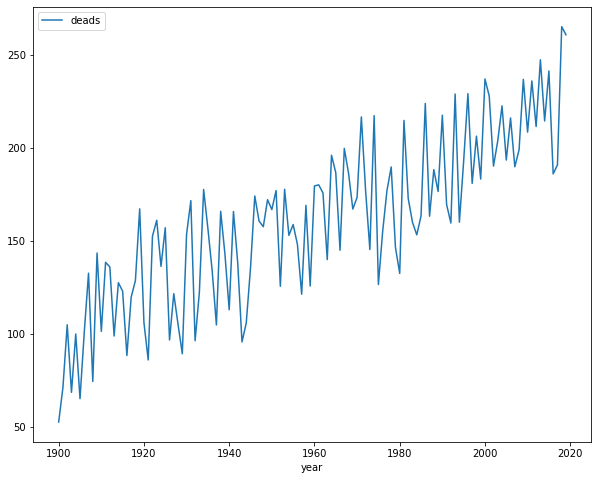

In [41]:
# Generar un grafico
df.plot(x="year", y="deads", figsize = (10,8))

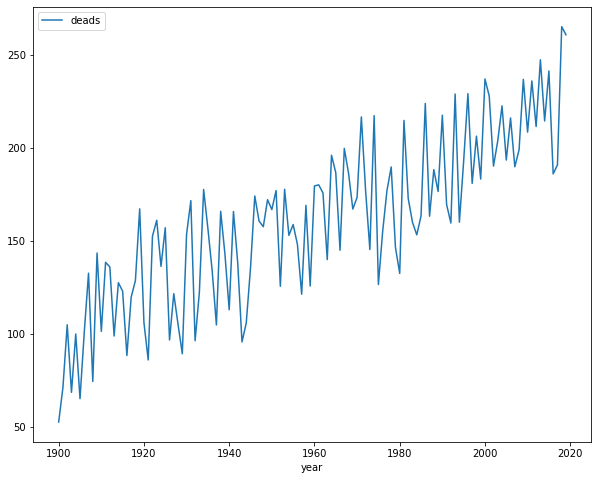

In [42]:
# Exportar grafico a png
myplot = df.plot(x="year", y="deads", figsize = (10,8))

In [44]:
my_fig = myplot.get_figure()

In [45]:
my_fig.savefig("../../../graphs/year-deads.png")